In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os, shutil

# 훈련, 검증, 테스트 분할을 위한 디렉터리
base_dir = '/content/gdrive/MyDrive/한이음자율형'
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 사진 디렉터리
train_f_dir = os.path.join(train_dir, 'train_F')
os.mkdir(train_f_dir)

# 훈련용 사진 디렉터리
train_b_dir = os.path.join(train_dir, 'train_B')
os.mkdir(train_b_dir)
######################################################################
# 검증용 사진 디렉터리
validation_f_dir = os.path.join(validation_dir, 'valid_F')
os.mkdir(validation_f_dir)

# 검증용 사진 디렉터리
validation_b_dir = os.path.join(validation_dir, 'valid_B')
os.mkdir(validation_b_dir)
######################################################################
# 테스트용 사진 디렉터리
test_f_dir = os.path.join(test_dir, 'test_F')
os.mkdir(test_f_dir)

# 테스트용 사진 디렉터리
test_b_dir = os.path.join(test_dir, 'test_B')
os.mkdir(test_b_dir)

original_f_dataset_dir = '/content/gdrive/MyDrive/한이음자율형/resize_front_150'
original_b_dataset_dir = '/content/gdrive/MyDrive/한이음자율형/resize_back_150'

fnames = ['1_{}.jpg'.format(i+1) for i in range(300)]
for fname in fnames:
    src = os.path.join(original_f_dataset_dir, fname)
    dst = os.path.join(train_f_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['1_{}.jpg'.format(i+1) for i in range(300,450)]
for fname in fnames:
    src = os.path.join(original_f_dataset_dir, fname)
    dst = os.path.join(validation_f_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['1_{}.jpg'.format(i+1) for i in range(450,500)]
for fname in fnames:
    src = os.path.join(original_f_dataset_dir, fname)
    dst = os.path.join(test_f_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['0_{}.jpg'.format(i+1) for i in range(300)]
for fname in fnames:
    src = os.path.join(original_b_dataset_dir, fname)
    dst = os.path.join(train_b_dir, fname)
    shutil.copyfile(src, dst)


fnames = ['0_{}.jpg'.format(i+1) for i in range(300,450)]
for fname in fnames:
    src = os.path.join(original_b_dataset_dir, fname)
    dst = os.path.join(validation_b_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['0_{}.jpg'.format(i+1) for i in range(450,500)]
for fname in fnames:
    src = os.path.join(original_b_dataset_dir, fname)
    dst = os.path.join(test_b_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(150, 150, 3)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8640128   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers

model.compile(loss = 'binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=25,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=25,
    class_mode = 'binary'
)

Found 600 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=10
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
20/20 [==============================] - 5s 203ms/step - loss: 3.2242 - accuracy: 0.5933 - val_loss: 0.6646 - val_accuracy: 0.7240
Epoch 2/30
20/20 [==============================] - 4s 187ms/step - loss: 0.7001 - accuracy: 0.7119 - val_loss: 1.3270 - val_accuracy: 0.5680
Epoch 3/30
20/20 [==============================] - 4s 184ms/step - loss: 0.8689 - accuracy: 0.7170 - val_loss: 0.3403 - val_accuracy: 0.8520
Epoch 4/30
20/20 [==============================] - 4s 185ms/step - loss: 0.8982 - accuracy: 0.7095 - val_loss: 0.2508 - val_accuracy: 0.8880
Epoch 5/30
20/20 [==============================] - 4s 185ms/step - loss: 0.5693 - accuracy: 0.8167 - val_loss: 0.2626 - val_accuracy: 0.8840
Epoch 6/30
20/20 [==============================] - 4s 185ms/step - loss: 0.6310 - accuracy: 0.7941 - val_loss: 0.2048 - val_accuracy: 0.9080
Epoch 7/30
20/20 [==============================] - 4s 186ms/step - loss: 0.5965 - accuracy: 0.8051 - val_loss: 0.1818 - val_accuracy: 0.9160
Epoch 

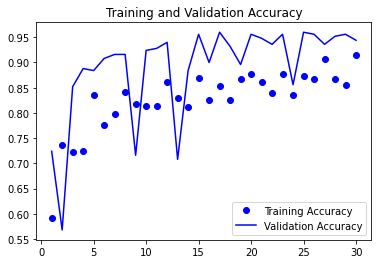

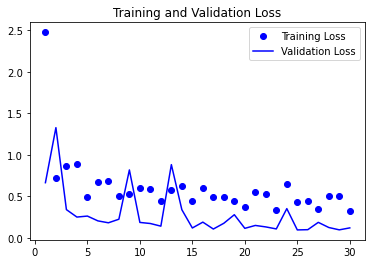

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=25,
    class_mode = 'binary'
)

model.evaluate(test_generator)

Found 100 images belonging to 2 classes.
4/4 [==============================] - 0s 49ms/step - loss: 0.1182 - accuracy: 0.9400


[0.11821892857551575, 0.9399999976158142]

In [ ]:
model.save('/content/gdrive/MyDrive/한이음자율형/Front_and_Top_2021_07_04.h5')